In [2]:
from statsmodels.tsa.stattools import acf
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
from scipy.stats import pearsonr
e=math.e

In [3]:
dep_l = pickle.load(open('../pickles/line_depths_dict.p','rb'))

/home/robbie/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


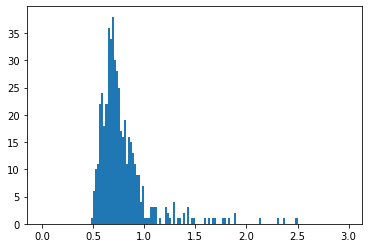

In [4]:
sample_nos = np.arange(100)

acfs = []
drop_inds = []
transect_count=0

for key in dep_l:
    
    station = dep_l[key]
    
    for date in station:

        transect_count += 1

        series = np.array(list(station[date]))
        
        series = series[~np.isnan(series)]
        
        autocorr = acf(series,fft=True)
        
        drop_ind = np.argmax(autocorr<1/e)
        
        x0 = drop_ind-1; x1 = drop_ind
        y0 = autocorr[drop_ind-1]; y1 = autocorr[drop_ind]
        
        y_hires = np.interp(np.arange(x0,x1,0.001),[x0,x1],[y0,y1])
    
        drop_ind = np.argmax(y_hires<1/e)/1000
        
#         print(x0,y0,x1,y1,x0+drop_ind)
        
        drop_inds.append(x0+drop_ind)
        
        acfs.append(autocorr)
        
drop_inds = np.array(drop_inds)

x = plt.hist(drop_inds,bins=np.arange(0,3,0.02))

In [5]:
x[1][np.argmax(x[0])]*10

6.800000000000001

In [6]:
x[1][13]

0.26

In [7]:
acfs = []
transect_count=0

for key in dep_l:
    
    station = dep_l[key]
    
    for date in station:

        transect_count += 1

        series = np.array(list(station[date]))
        
        series = series[~np.isnan(series)]
        
        acfs.append(acf(series,fft=True))
        
        
n1 = []
for f in acfs:
    n1.append(f[1])

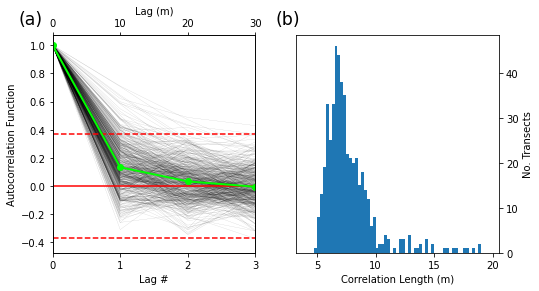

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

for f in acfs:
    
    ax1.plot(f,linewidth=0.1,color='k',alpha=0.5)
    
ax1.plot(np.nanmean(acfs,axis=0),color='lime',marker='o',linewidth=2,zorder=5)
    
ax1.set_ylabel('Autocorrelation Function')
ax1.set_xlabel('Lag #')
ax1.set_xlim(0,3)
ax1.set_xticks(np.arange(0,4,1))

ax1b = ax1.twiny()
ax1b.set_xlabel('Lag (m)')
ax1b.set_xlim(0,3)
ax1b.set_xticks(np.arange(0,40,10))

    
ax1.axhline(0,color='r')
ax1.axhline(1/math.e, color='r', ls='--')
ax1.axhline(-1/math.e, color='r', ls='--')


    
#########

# n1a = np.array(n1)

# ax2.hist(n1,bins=bins)
ax2.hist(drop_inds*10,bins=np.arange(4,20,0.25))

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# ax2.set_xticks(bins)
# ax2.set_xticklabels(bins/(1/e))
# ax2.set_xticklabels(xticks,rotation=90)


# ax2.axvline(1/e, color='k', ls='--')
ax2.set_ylabel('No. Transects',)
# ax2.set_title('Lag = 10m')
ax2.set_xlabel('Correlation Length (m)')

# ax2.annotate(s='n = 499\nn[CL>1/e] = 47 \nn[CL<1/e] = 452',
#              xycoords='axes fraction',
#              xy=(0.01,0.99),va='top')

ax1.annotate('(a)', fontsize='xx-large', xy=(-0.17,1.05), xycoords= 'axes fraction')
ax2.annotate('(b)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/sub-km-snow-depth-dist/sup_figs/autocorr.png', bbox_inches='tight',dpi=500)

plt.show()

In [35]:
corrs_d = {}
cor_p_d = {}

for lag in np.arange(1,11):
    
    corrs = []
    cor_p = []

    for key in dep_l:

        station = dep_l[key]

        for date in station:

            transect_count += 1

            series = np.array(list(station[date]))

            series = series[~np.isnan(series)]

    #         try:
            pr = pearsonr(series[lag:], series[:-lag])

            corrs.append(pr[0])
            cor_p.append(pr[1])

    #         except:

    #             print(series)
    corrs_d[lag] = np.array(corrs)
    cor_p_d[lag] = np.array(cor_p)

        

0.36473986560351945
0.3158168676588882
0.31727627186885254


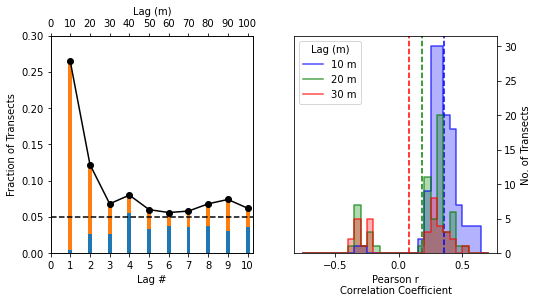

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

colors = ['b','g','r']
for i in range(1,4):
    
    sig_1l = corrs_d[i][cor_p_d[i]<0.05]
    
    print(np.mean(sig_1l[sig_1l>0]))
    
    ax2.axvline(np.mean(sig_1l),color=colors[i-1],ls='--')

    s1 = ax2.hist(sig_1l,
                  bins = np.arange(-0.75,0.75,0.05),
                  color=colors[i-1],
                 alpha=0.3)
    ax2.step(s1[1],[0]+list(s1[0]),color=colors[i-1],alpha=0.7,
                         label = f'{i}0 m',)


ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('No. of Transects')
ax2.set_xlabel('Pearson r\nCorrelation Coefficient')
ax2.legend(title = 'Lag (m)')
# print(np.mean(valid_corrs))

####

sig_frac = []
pos_frac = []

lags = np.arange(1,11,1)

for lag in lags:
    
    n_sig = len(corrs_d[lag][cor_p_d[lag]<0.05])
    n_pos = len(corrs_d[lag][(cor_p_d[lag]<0.05) & (corrs_d[lag] > 0)])
    
    sig_frac.append( n_sig/499 )
    pos_frac.append( n_pos/499 )

pos_frac = np.array(pos_frac)
neg_frac = sig_frac-pos_frac
    
ax1.plot(lags,sig_frac,marker='o',color='k')
ax1.bar(lags,neg_frac,width=0.2)
ax1.bar(lags,pos_frac,bottom=neg_frac,width=0.2)
ax1.axhline(0.05, ls='--',color='k')
ax1.set_ylim(0,0.3)
ax1.set_xlim(0,10.3)
ax1.set_xticks(np.arange(0,11,1))

ax1b = ax1.twiny()
ax1b.set_xlabel('Lag (m)')

ax1b.set_xlim(0,10.3)
ax1b.set_xticks(np.arange(0,11,1))
ax1b.set_xticklabels(np.arange(0,110,10))

ax1.set_ylabel('Fraction of Transects')
ax1.set_xlabel('Lag #')

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/sub-km-snow-depth-dist/figs/autocorr_main.png',
            bbox_inches='tight',dpi=500)


In [41]:
save_dict = pickle.load(open('../pickles/spacing.p','rb'))
save_dict.keys()

dict_keys([1, 2, 3, 5, 10])

In [62]:
sig_frac

[0.26452905811623245,
 0.12224448897795591,
 0.06813627254509018,
 0.08016032064128256,
 0.06012024048096192,
 0.056112224448897796,
 0.05811623246492986,
 0.06813627254509018,
 0.07414829659318638,
 0.06212424849699399]

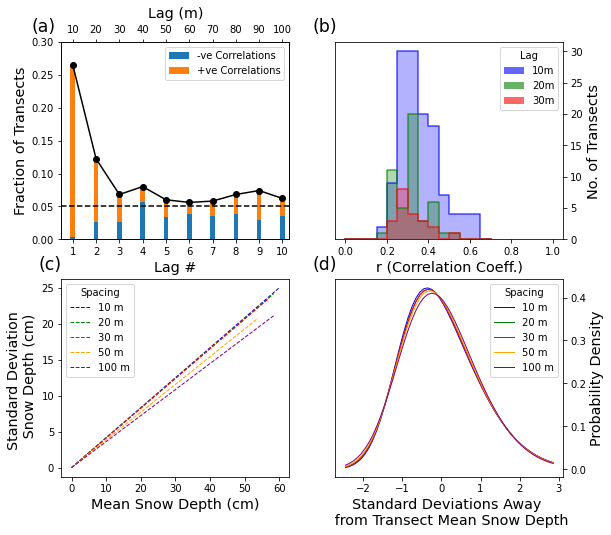

In [61]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(9,8))


ax1.annotate('(a)', fontsize='xx-large', xy=(-0.13,1.05), xycoords= 'axes fraction')
ax2.annotate('(b)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')
ax3.annotate('(c)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')
ax4.annotate('(d)', fontsize='xx-large', xy=(-0.1,1.05), xycoords= 'axes fraction')

###

ax1.plot(lags,sig_frac,marker='o',color='k')
ax1.bar(lags,neg_frac,width=0.2,label='-ve Correlations')
ax1.bar(lags,pos_frac,bottom=neg_frac,width=0.2,label='+ve Correlations')

ax1.axhline(0.05, ls='--',color='k')
ax1.set_ylim(0,0.3)
ax1.set_xlim(0.5,10.3)
ax1.set_xticks(np.arange(1,11,1))

ax1b = ax1.twiny()
ax1b.set_xlabel('Lag (m)', fontsize='x-large', labelpad=7)

ax1b.set_xlim(0.5,10.3)
ax1b.set_xticks(np.arange(1,11,1))
ax1b.set_xticklabels(np.arange(1,11,1)*10)

ax1.set_ylabel('Fraction of Transects', fontsize='x-large')
ax1.set_xlabel('Lag #', fontsize='x-large')

ax1.legend()

##################


for i in range(1,4):
    
    sig_1l = corrs_d[i][cor_p_d[i]<0.05]

    s1 = ax2.hist(sig_1l, bins = np.arange(0,0.75,0.05),color=colors[i-1],
             alpha=0.3)
    
    ax2.hist([],color=colors[i-1],alpha=0.6,label = f'{i}0m')
    
    ax2.step(s1[1],[0]+list(s1[0]),color=colors[i-1],alpha=0.7,)
    
    

    
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('No. of Transects', fontsize='x-large')
ax2.set_xlabel('r (Correlation Coeff.)', fontsize='x-large')
ax2.legend(title = 'Lag')

################################################


for spacing, color in zip([1,2,3,5,10],
                          colors+['orange','purple']):
    
    a,b,c,d = save_dict[spacing]
    
    ax3.plot(a, b, lw=1, ls='--', color=color, label = f'{spacing}0 m')

    ax4.plot(c, d, lw=1, color=color,  label = f'{spacing}0 m')
    
######################################
    

ax3.set_xlabel('Mean Snow Depth (cm)', fontsize='x-large')
ax3.set_ylabel('Standard Deviation \n Snow Depth (cm)', fontsize='x-large')

ax3.legend(title = 'Spacing')

##########################################
    
ax4.set_ylabel('Probability Density', fontsize='x-large')
ax4.set_xlabel('Standard Deviations Away \n from Transect Mean Snow Depth', fontsize='x-large')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax4.legend(title = 'Spacing')

# plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/sub-km-snow-depth-dist/figs/sampling.png', bbox_inches='tight',dpi=500)


In [9]:
sig_frac

[0.2832618025751073,
 0.13090128755364808,
 0.07296137339055794,
 0.08583690987124463,
 0.06437768240343347,
 0.060085836909871244,
 0.06223175965665236]

In [26]:
len(cor_p[cor_p<0.05])/len(cor_p[cor_p>0.05])

TypeError: '<' not supported between instances of 'list' and 'float'

In [54]:
save_dict.keys()

dict_keys([1, 2, 3])